## **Forest Type Predication:**

## Hint: Another Approach without doing(Standardization, Remove Outliers)

### Content:
*   Data Statistics and Understanding
*   Data Visualization
*   Data Preparation and Cleaning
*   Feature selection
*   Predaction Model Traning
*   Evaluation and Analysis

In [1]:
#include Libraries
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import math

# preprocessing functions and evaluation models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# machine learning models
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import The dataSet
train_x =  pd.read_csv('./x_train.csv')
train_y  = pd.read_csv('./y_train.csv')
test_x  =  pd.read_csv('./x_test.csv')

In [3]:
# check the data Measuremnent levels
train_x.head()

,id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0,3342,15,13,350,55,2118,208,212,139,...,1,0,0,0,0,0,0,0,0,0
1,1,2764,39,13,175,43,2648,220,210,122,...,0,0,0,0,0,0,0,0,0,0
2,2,2773,158,5,162,14,2012,226,241,149,...,0,0,0,0,0,0,0,0,0,0
3,3,3083,108,16,30,-14,2639,246,220,98,...,1,0,0,0,0,0,0,0,0,0
4,4,3096,40,4,201,38,4592,220,231,147,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# double check using the dtypes method
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   id                                  406708 non-null  int64
 1   Elevation                           406708 non-null  int64
 2   Aspect                              406708 non-null  int64
 3   Slope                               406708 non-null  int64
 4   Horizontal_Distance_To_Hydrology    406708 non-null  int64
 5   Vertical_Distance_To_Hydrology      406708 non-null  int64
 6   Horizontal_Distance_To_Roadways     406708 non-null  int64
 7   Hillshade_9am                       406708 non-null  int64
 8   Hillshade_Noon                      406708 non-null  int64
 9   Hillshade_3pm                       406708 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  406708 non-null  int64
 11  Wilderness_Area_1                   406708 non-null 

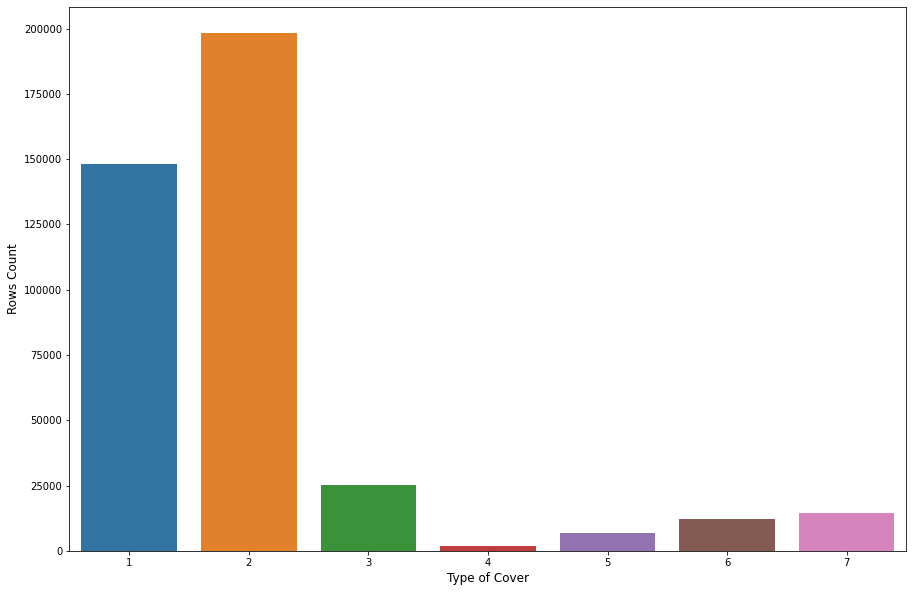

In [5]:
# Chech the Data Balance
plt.figure(figsize=(15,10))
sns.countplot(train_y['Cover_Type'])
plt.xlabel("Type of Cover", fontsize=12)
plt.ylabel("Rows Count", fontsize=12)
plt.show()

In [8]:
# Concatenate train_x with train_y
trees = pd.concat([train_x,train_y],axis=1)

In [9]:
trees.std()

id                                    117406.630977
Elevation                                280.028028
Aspect                                   111.925462
Slope                                      7.490411
Horizontal_Distance_To_Hydrology         212.462577
Vertical_Distance_To_Hydrology            58.327213
Horizontal_Distance_To_Roadways         1559.559608
Hillshade_9am                             26.785128
Hillshade_Noon                            19.777075
Hillshade_3pm                             38.269583
Horizontal_Distance_To_Fire_Points      1323.353986
Wilderness_Area_1                          0.497401
Wilderness_Area_2                          0.221183
Wilderness_Area_3                          0.495851
Wilderness_Area_4                          0.244072
Soil_Type_1                                0.071892
Soil_Type_2                                0.113240
Soil_Type_3                                0.090650
Soil_Type_4                                0.144945
Soil_Type_5 

In [10]:
trees.drop(['Soil_Type_7'], axis=1, inplace=True)
trees.drop(['Soil_Type_8'], axis=1, inplace=True)
trees.drop(['Soil_Type_15'], axis=1, inplace=True)
trees.drop(['Soil_Type_36'], axis=1, inplace=True)
trees.drop(['Soil_Type_37'], axis=1, inplace=True)

In [11]:
test_x.drop(['Soil_Type_7'], axis=1, inplace=True)
test_x.drop(['Soil_Type_8'], axis=1, inplace=True)
test_x.drop(['Soil_Type_15'], axis=1, inplace=True)
test_x.drop(['Soil_Type_36'], axis=1, inplace=True)
test_x.drop(['Soil_Type_37'], axis=1, inplace=True)

In [12]:
trees.drop(['id'], axis=1, inplace=True)
test_x.drop (['id'], axis=1, inplace=True)

Text(0.5, 1.0, 'Pearson Correlation of Numeric Features')

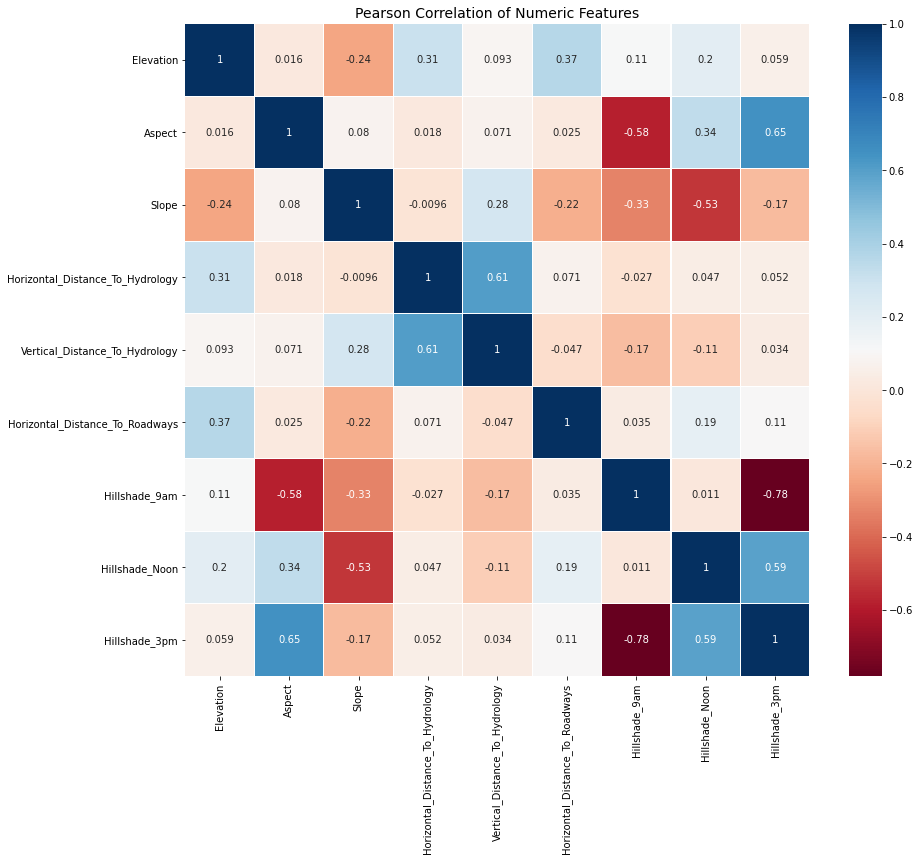

In [13]:
corr = trees.iloc[:,0:9].corr()
# plot the heatmap
plt.figure(figsize=(14,12))
colormap = plt.cm.RdBu
sns.heatmap(corr,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Numeric Features', size=14)

In [14]:
trees['Diagonal_Distanse_to_Hydrolody'] = (trees['Horizontal_Distance_To_Hydrology']**2+trees['Vertical_Distance_To_Hydrology']**2)**0.5
test_x['Diagonal_Distanse_to_Hydrolody']  = (test_x['Horizontal_Distance_To_Hydrology']**2+test_x['Vertical_Distance_To_Hydrology']**2)**0.5

In [15]:
bkTree = trees.copy()

In [16]:
train_y['Cover_Type'] = bkTree['Cover_Type'] 

In [17]:
trees.drop(['Cover_Type'], axis=1, inplace=True)

In [18]:
train_x = trees.copy()

In [19]:
train_x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_38,Soil_Type_39,Soil_Type_40,Diagonal_Distanse_to_Hydrolody
0,3342,15,13,350,55,2118,208,212,139,1486,...,0,1,0,0,0,0,0,0,0,354.295075
1,2764,39,13,175,43,2648,220,210,122,366,...,0,0,0,0,0,0,0,0,0,180.205438
2,2773,158,5,162,14,2012,226,241,149,967,...,0,0,0,0,0,0,0,0,0,162.603813
3,3083,108,16,30,-14,2639,246,220,98,1909,...,0,1,0,0,0,0,0,0,0,33.105891
4,3096,40,4,201,38,4592,220,231,147,2432,...,0,0,0,0,0,0,0,0,0,204.560504


In [20]:
x_train, x_test, y_train, y_test = train_test_split(train_x, bkTree['Cover_Type'], test_size = 0.2, random_state = 10)

x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [21]:
# class_weight='balanced' because the data are imbalanced
tree = ExtraTreesClassifier(n_estimators=500, criterion = 'entropy',class_weight='balanced')

In [22]:
tree.fit(x_train, y_train)

ExtraTreesClassifier(class_weight='balanced', criterion='entropy',
                     n_estimators=1)

In [28]:
y_pred = tree.predict(x_test)
# Accuracy score
print(accuracy_score(y_test, y_pred)*100)

In [24]:
y_pred_f = tree.predict(test_x)

In [25]:
x =  pd.read_csv('./y_test_baseline.csv')

In [29]:
y_pred_f.shape

In [27]:
#Kaggle Submition
my_submission = pd.DataFrame({'id': x.id,'Cover_Type': y_pred_f})
my_submission.head()
my_submission.to_csv('submission10.csv', index=False)